In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from backgrounder import SimpleBackgrounder, GaussianBackgrounder

In [3]:
background = cv2.imread("test_images/background.jpg", cv2.IMREAD_GRAYSCALE)
image = cv2.imread("test_images/image.jpg", cv2.IMREAD_GRAYSCALE)

In [4]:
thresholds = (0, 31, 95, 127, 152, 192)
subtractors = [SimpleBackgrounder(background=background, threshold=t) for t in thresholds]

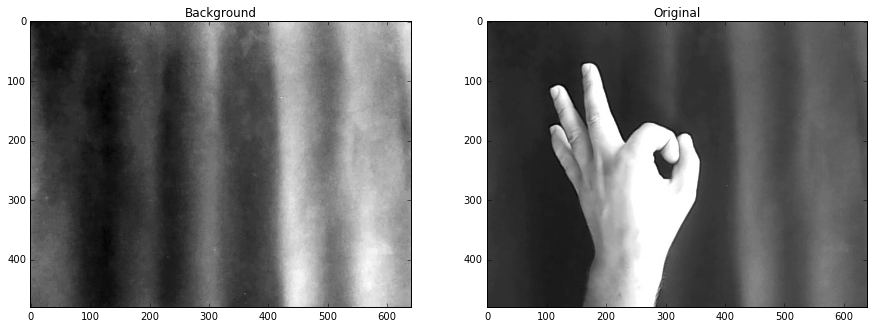

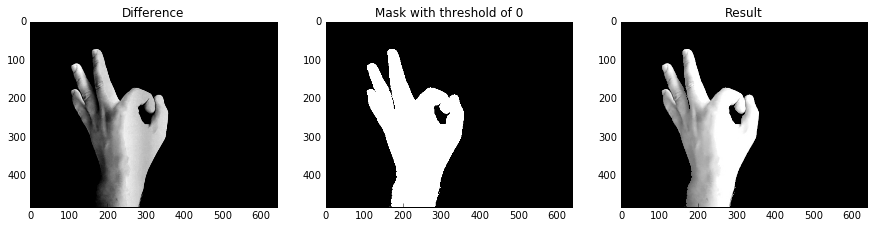

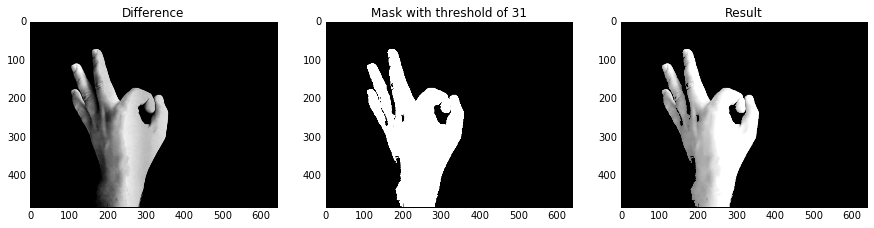

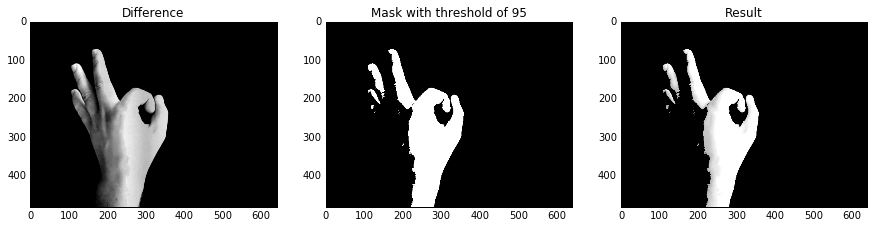

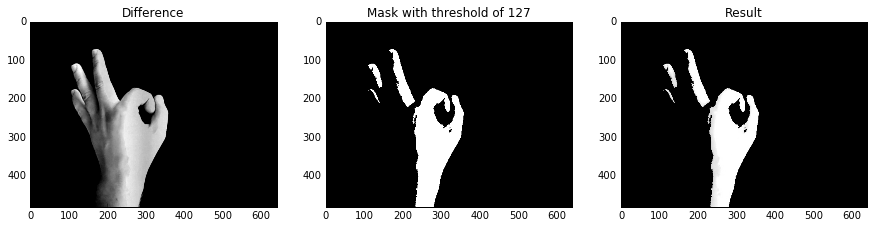

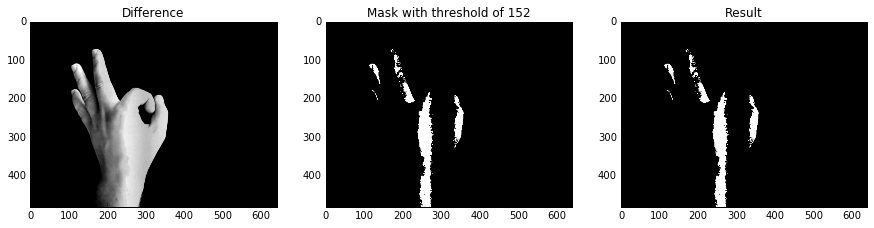

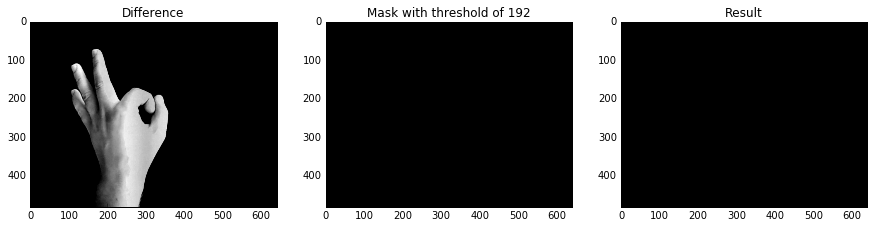

In [5]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.title("Background")
plt.imshow(background, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Original")
plt.imshow(image, cmap='gray')

for subtractor in subtractors:
    difference = subtractor.subtract(image)
    mask = subtractor.get_mask(image)
    foreground = subtractor.apply_mask(image, mask)
    # ...
    # same as
    # foreground = subtractor.apply(image)
    
    
    plt.figure(figsize=(15, 8))
    plt.subplot(1, 3, 1)
    plt.title("Difference")
    plt.imshow(difference, cmap='gray')    
    plt.subplot(1, 3, 2)
    plt.title("Mask with threshold of {}".format(subtractor.threshold))
    plt.imshow(mask, cmap='gray')
    plt.subplot(1, 3, 3)
    plt.title("Result")
    plt.imshow(foreground, cmap='gray')
    plt.show()

In [6]:
sigmas = range(1, 101, 20)
subtractors = [GaussianBackgrounder(background=background, sigma=s) for s in sigmas]

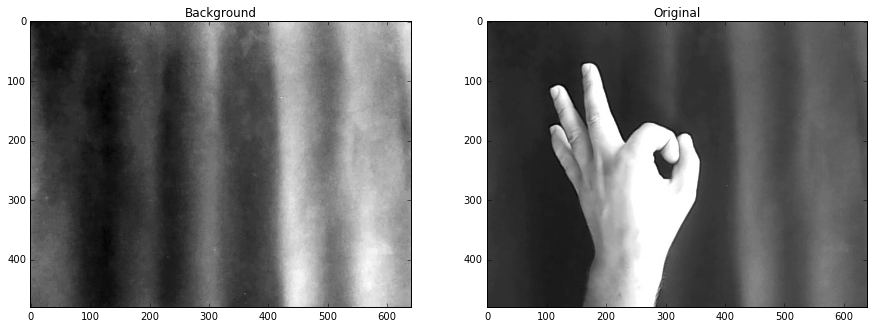

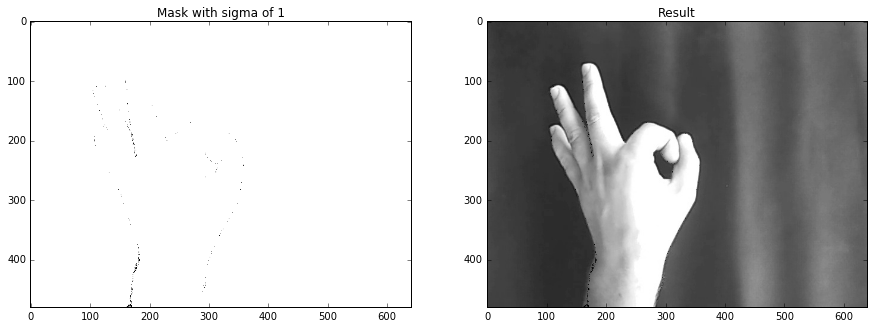

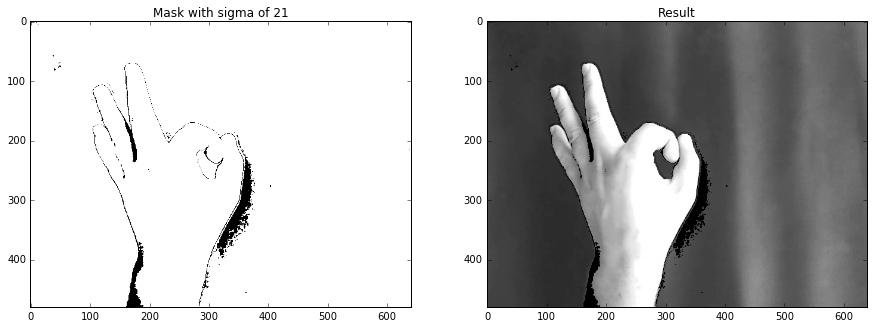

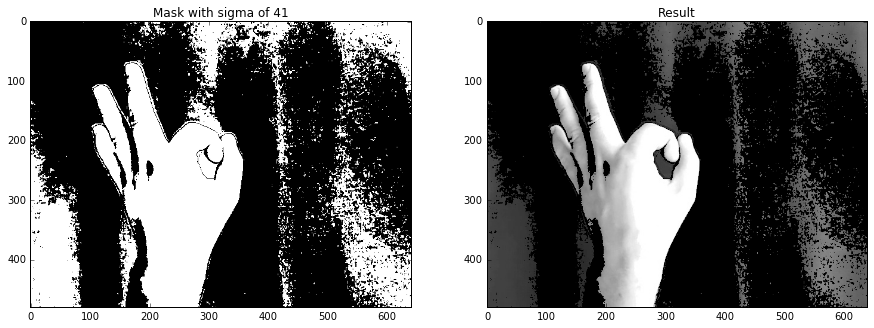

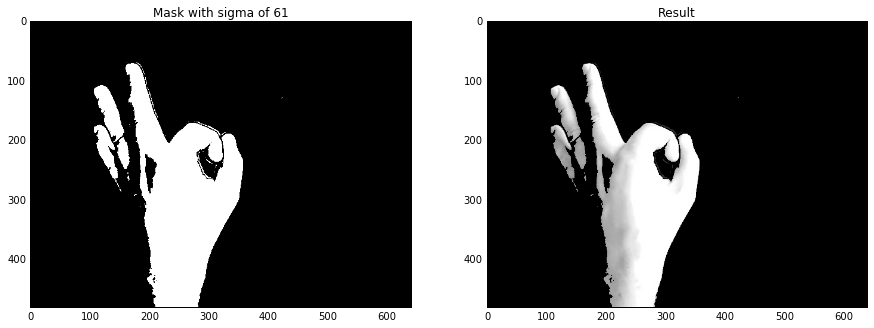

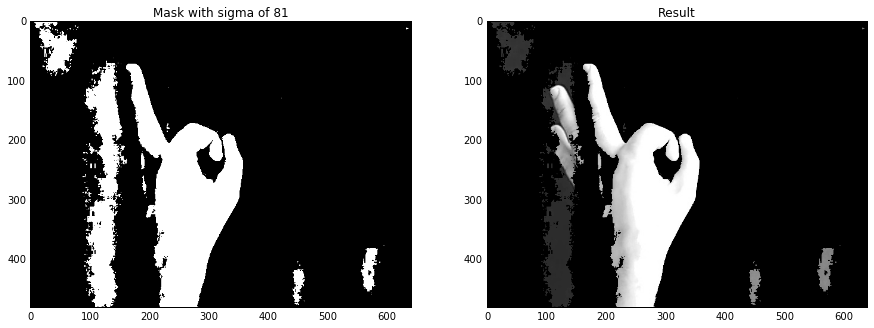

In [7]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.title("Background")
plt.imshow(background, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Original")
plt.imshow(image, cmap='gray')

for subtractor in subtractors:
    mask = subtractor.get_mask(image)
    foreground = subtractor.apply_mask(image, mask)
    # ...
    # same as
    # foreground = subtractor.apply(image)
    
    
    plt.figure(figsize=(15, 8))
    plt.subplot(1, 2, 1)
    plt.title("Mask with sigma of {}".format(subtractor.sigma))
    plt.imshow(mask, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.title("Result")
    plt.imshow(foreground, cmap='gray')
    plt.show()